In [136]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
bank = pd.read_csv("/Users/Sys/Downloads/bank-full.csv",sep=';')


In [108]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [109]:
bank.shape

(45211, 17)

In [110]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [111]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [95]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#bank[bank.duplicated()].shape

(0, 17)

In [14]:
#bank_dp=bank[bank.duplicated()]

In [15]:
#bank_dp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,term_deposit


In [112]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [113]:
bank.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

In [19]:
#bank[num_x].isnull().sum()

age         0
balance     0
day         0
campaign    0
pdays       0
previous    0
dtype: int64

In [114]:
cat_x=['job','marital','education','default','housing','loan','contact','month','poutcome']

In [115]:
bank[cat_x].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
dtype: int64

In [116]:
new_cat_x=pd.get_dummies(bank[cat_x],drop_first=False)

In [118]:
new_cat_x.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [119]:
bank1=pd.concat([bank,new_cat_x],axis=1)

In [120]:
bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [121]:
bank1.shape

(45211, 61)

In [122]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  object
 7   loan                 45211 non-null  object
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  month                45211 non-null  object
 11  duration             45211 non-null  int64 
 12  campaign             45211 non-null  int64 
 13  pdays                45211 non-null  int64 
 14  previous             45211 non-null  int64 
 15  poutcome             45211 non-null  object
 16  y   

In [141]:
bank2=bank1.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'],axis=1)


In [142]:
bank2.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [143]:
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   balance              45211 non-null  int64 
 2   day                  45211 non-null  int64 
 3   duration             45211 non-null  int64 
 4   campaign             45211 non-null  int64 
 5   pdays                45211 non-null  int64 
 6   previous             45211 non-null  int64 
 7   y                    45211 non-null  object
 8   job_admin.           45211 non-null  uint8 
 9   job_blue-collar      45211 non-null  uint8 
 10  job_entrepreneur     45211 non-null  uint8 
 11  job_housemaid        45211 non-null  uint8 
 12  job_management       45211 non-null  uint8 
 13  job_retired          45211 non-null  uint8 
 14  job_self-employed    45211 non-null  uint8 
 15  job_services         45211 non-null  uint8 
 16  job_

In [148]:
x=bank2.loc[:,bank2.columns!='y']

In [149]:
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [150]:
y=bank1['y']

In [151]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [152]:
y_labelencoder = LabelEncoder()
y=y_labelencoder.fit_transform(y[:])
print(y)

[0 0 0 ... 1 0 0]


In [153]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [154]:
from sklearn.model_selection import train_test_split
train_x,test_x=train_test_split(x,test_size=.2,random_state=0)
train_y,test_y=train_test_split(y,test_size=.2,random_state=0)

In [155]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x= scaler.fit_transform(test_x)
train_x,test_x,train_y,test_y

(array([[ 1.51506117, -0.23163698, -0.69851397, ..., -0.20517128,
         -0.18404781,  0.47153594],
        [-0.36959746,  0.10603762, -0.81871672, ..., -0.20517128,
         -0.18404781,  0.47153594],
        [-0.55806332,  0.47063537, -1.66013596, ..., -0.20517128,
         -0.18404781, -2.12072912],
        ...,
        [-0.55806332, -0.34030268, -0.57831122, ..., -0.20517128,
         -0.18404781,  0.47153594],
        [ 2.74008927, -0.24526074,  1.34493276, ..., -0.20517128,
         -0.18404781, -2.12072912],
        [ 0.47849892, -0.42658649, -0.21770297, ..., -0.20517128,
         -0.18404781,  0.47153594]]),
 array([[-0.37504691,  0.02772619, -0.6943886 , ..., -0.20915121,
         -0.19338611,  0.47644659],
        [-0.46898783, -0.54589594, -0.21447144, ..., -0.20915121,
         -0.19338611,  0.47644659],
        [ 0.56436234, -0.59889364, -0.93434718, ..., -0.20915121,
         -0.19338611,  0.47644659],
        ...,
        [-1.22051523, -0.45583449,  1.10530075, ..., -

In [158]:
test_y

array([0, 1, 0, ..., 0, 1, 0])

In [160]:
classifier=LogisticRegression(random_state=0)
classifier.fit(train_x,train_y)

LogisticRegression(random_state=0)

In [161]:
y_pred=classifier.predict(test_x)
print(y_pred)

[0 1 0 ... 0 0 0]


In [162]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [163]:
results= pd.crosstab(test_y,y_pred, rownames=['Act'], colnames=['Pred'])
print(results)

Pred     0    1
Act            
0     7753  227
1      683  380


In [164]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
print (cm)

[[7753  227]
 [ 683  380]]


In [165]:
import numpy as np
Accuracy=np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(Accuracy)

0.8993696782041358


In [166]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.36      0.46      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [167]:
fpr, tpr, thresholds = roc_curve(test_y, classifier.predict_proba (test_x)[:,1])

In [168]:
auc = roc_auc_score(test_y, y_pred)

Text(0, 0.5, 'True Positive Rate')

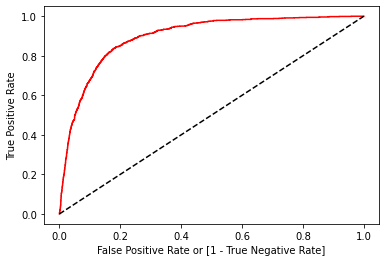

In [169]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [170]:
print(auc)

0.664516359100951


In [172]:
from sklearn.model_selection import train_test_split
train_x1,test_x1=train_test_split(x,test_size=.4,random_state=0)
train_y1,test_y1=train_test_split(y,test_size=.4,random_state=0)

In [173]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
train_x1=scaler.fit_transform(train_x1)
test_x1= scaler.fit_transform(test_x1)
train_x1,test_x1,train_y1,test_y1

(array([[ 0.38428039, -0.43202923,  0.38562906, ..., -0.20333509,
         -0.18535515, -2.12316209],
        [-0.65157388, -0.27581668, -0.45643282, ..., -0.20333509,
         -0.18535515,  0.4709956 ],
        [-1.02824816, -0.52731241, -0.09554916, ..., -0.20333509,
         -0.18535515,  0.4709956 ],
        ...,
        [-0.55740531, -0.33966289, -0.57672738, ..., -0.20333509,
         -0.18535515,  0.4709956 ],
        [ 2.73849465, -0.24470381,  1.34798549, ..., -0.20333509,
         -0.18535515, -2.12316209],
        [ 0.47844896, -0.42587148, -0.21584371, ..., -0.20333509,
         -0.18535515,  0.4709956 ]]),
 array([[-0.37312118,  0.01806717, -0.69868605, ..., -0.20987623,
         -0.18683418,  0.47480212],
        [-0.46730372, -0.53718486, -0.21886919, ..., -0.20987623,
         -0.18683418,  0.47480212],
        [ 0.56870423, -0.58848531, -0.93859449, ..., -0.20987623,
         -0.18683418,  0.47480212],
        ...,
        [-0.37312118, -0.28135316,  0.3809019 , ..., -

In [174]:
classifier=LogisticRegression(random_state=0)
classifier.fit(train_x1,train_y1)

LogisticRegression(random_state=0)

In [175]:
y1_pred=classifier.predict(test_x1)
print(y1_pred)

[0 1 0 ... 0 0 0]


In [176]:
results1= pd.crosstab(test_y1,y1_pred, rownames=['Act'], colnames=['Pred'])
print(results1)

Pred      0    1
Act             
0     15521  436
1      1385  743


In [177]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(test_y1,y1_pred)
print (cm1)

[[15521   436]
 [ 1385   743]]


In [178]:
import numpy as np
Accuracy1=np.sum([cm1[0,0],cm1[1,1]])/np.sum(cm1)
print(Accuracy1)

0.8993088194636439


In [179]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print(classification_report(test_y1,y1_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     15957
           1       0.63      0.35      0.45      2128

    accuracy                           0.90     18085
   macro avg       0.77      0.66      0.70     18085
weighted avg       0.88      0.90      0.89     18085



In [180]:
fpr, tpr, thresholds = roc_curve(test_y1, classifier.predict_proba (test_x1)[:,1])

In [182]:
auc = roc_auc_score(test_y1, y1_pred)

Text(0, 0.5, 'True Positive Rate')

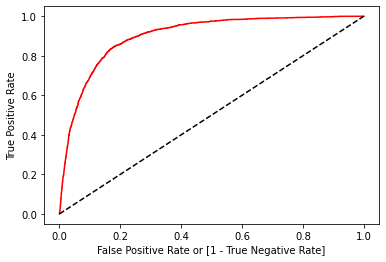

In [183]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [184]:
print(auc)

0.6609153518077955
